# Práctica 1:

> Creado por:
*   Alejandro López Gómez
*   Cristina del Pilar Mallaupoma Cáceres
*   Emilio Macías Do Santos

In [ ]:
#Carga de las librerias necesarias

!pip install yfinance

import xlrd as xls
import pandas as pd
from scipy.ndimage.interpolation import shift
import numpy as np
import datetime
import matplotlib.pylab as plt
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import yfinance as yf

data = yf.Ticker("^GSPC")
Fincio = datetime.datetime(2021,1,4)
Ffin = datetime.datetime(2022,9,30)
SP500 = data.history(start=Fincio, end=Ffin)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


####**1. De	cuantos	parámetros	consta	el	modelo? (1	punto)**
  a. Cinco
  
  b. Seis

In [ ]:
q = SP500.Open
precios= np.array(q)

def calcularRt():
  rT = []
  for i in range(1,precios.size):
    rT.append((precios[i]-precios[i-1])/precios[i-1])
  return rT

rT = calcularRt()

def calcularX():
  Xone = np.ones(len(rT)-5)
  x_1 = rT[4:len(rT)-1]
  x_2 = rT[3:len(rT)-2]
  x_3 = rT[2:len(rT)-3]
  x_4 = rT[1:len(rT)-4]
  x_5 = rT[:len(rT)-5]

  aux1 = np.vstack((Xone,x_1)) 
  aux2 = np.vstack((aux1,x_2))
  aux3 = np.vstack((aux2,x_3))
  aux4 = np.vstack((aux3,x_4))
  aux5 = np.vstack((aux4,x_5))

  return aux5.T

y_datos = rT[5:len(precios)]

X = calcularX() #ndarray

param = np.linalg.inv(X.T @ X) @ ( X.T @ y_datos)
print("("+"{:.7f}".format(param[0])+") + ("+"{:.7f}".format(param[1])+") + ("+"{:.7f}".format(param[2])+") + ("+"{:.7f}".format(param[3])+") + ("+"{:.7f}".format(param[4])+") + ("+"{:.7f}".format(param[5])+")")

(-0.0000085) + (0.1163998) + (-0.0436355) + (-0.0474308) + (0.0355604) + (-0.0331712)


# ***Respuesta 1:***

La a se corresponde con el intercepto (vector de unos), las x_n son nuestras variables independientes, Y es la variable dependiente y las b_n son nuestros parámetros. Por lo tanto tenemos 6 parametros, algo que podemos comprobar usando python.



####  **2. Los parámetros correspondientes al tercer y cuarto regresor son iguales?**
  a. Si

  b. No

In [ ]:
print("P3: "+"{:.8f}".format(param[3])+", P4: "+"{:.8f}".format(param[4]))

print("La ecuacion de nuestro modelo seria: ("+"{:.7f}".format(param[0])+") + ("+"{:.7f}".format(param[1])+" X1"+") + ("+
      "{:.7f}".format(param[2])+" X2"+") + ("+"{:.7f}".format(param[3])+" X3"+") + ("+"{:.7f}".format(param[4])+" X4"+") + ("+"{:.7f}".format(param[5])+" X5)")


P3: -0.04743078, P4: 0.03556043
La ecuacion de nuestro modelo seria: (-0.0000085) + (0.1163998 X1) + (-0.0436355 X2) + (-0.0474308 X3) + (0.0355604 X4) + (-0.0331712 X5)


# ***Respuesta 2:***

Obtenemos los parametros de nuestra variable *param* el cual tiene todos los parametros de todos los regresores, se muestra tambien como sería nuestra ecuación


####  **3. Las tres métricas, proporcionan los mismos resultados (el mismo valor)? (2 puntos)**
  a. Si
    
  b. No

In [ ]:
y_predicc= X@param

med_mse = mse(y_datos,y_predicc)
med_mae = mae(y_datos,y_predicc)
med_mape = mape(y_datos,y_predicc)

print("{:.8f}".format(med_mse))
print("{:.8f}".format(med_mae))
print("{:.8f}".format(med_mape))

0.00010972
0.00775541
1.55516921


#***Respuesta 3***

*mse* es el *error cuadrático medio*, utiliza el cuadrado para quitar negativos, pero al utilizarlo aumenta la medida.  

Penaliza más donde el error es muy grande, es mucho más sensible a los valores extremos. 

Mientras mayor sea este valor peor es nuestro modelo. Aún así nuestro resultado es menor que 1, por lo que podemos decir que es posible que estemos subestimando la maldad del modelo.

el *error cuadrático medio* es muy sensibles a valores extremos, nuestro resultado es menor que 1, nuestros valores que constan entre 1 y -1. al estar al cuadrado salé un error muy pequeño, por lo que podemos decir que es posible que estemos subestimando la maldad del modelo. es muy raro que hayan valores pequeños, aún así nuestro resultado es menor que 1.

*mae* es el *error absoluto medio*, representa la distancia vertical promedio entre cada punto y la recta identidad, por lo tanto de su valor real, en este caso utilizamos el absoluto para eliminar los casos negativos. 

Es el promedio de la diferencia absoluta entre los valores predichos y el valor observado. Es el error más fácil de interpretar ya que es sólo el error promedio. 

Al contrario de *mse*, no es tan sensible a errores, aún así tenemos un error relativamente bajo pero más alto que *mse*, lo cuál puede significar que tenemos errores sesgados.

El *error porcentual absoluto medio*  mide el promedio del error en porcentaje y no considera el signo. Determina la precisión de un modelo y lo mide como porcentaje. según nuestros resultado 1,5% , interpretamos que nuestro modelo tiene un buen ajuste. Aún así por las anteriores 3 medidas, seguimos pensando que nuestro modelo está siendo sobreestimado 

#### **4. Suponga que comparamos las predicciones frente a un paseo aleatorio rt=0 empleando el mape, las predicciones del modelo lineal son mejores? (2 puntos)**
  a. Si
    
  b. No

In [ ]:
Y0 = np.zeros(len(y_datos))
mapePaseoAleatorio = mape(y_datos,Y0)
print(mapePaseoAleatorio)

1.0


#***Respuesta 4***

Estamos comparando un nuestra y_datos con una predicción usando un paseo aleatorio de rt=0. por lo que tenemos que si el R_t+1 = R_t + Eta_t+1, sabemos que lo mejor que nos puede pasar es que no varie, por lo que Eta_t+1 = 0, ya que al ser las noticias actuales y no tenerlas nos pondremos en el mejor de los casos.

Lo que nos queda R_t+1 = R_t, pero nos dicen que tenemos un paseo aleatorio de R_t = 0, por lo que nos quedan todos los rendimientos a 0, creando asi una matriz de 0 y usando mape con nuestros datos, al ser 0 la predicción tenemos siempre y_datos/y_datos por lo que la media de sus sumas sera 1 

Como bien sabemos, el paseo aleatorio estipula que no hay relación entre los datos anteriores y los datos futuros. Todo es aleatorio, y no podemos medirlo. Por lo que, según está premisa, decimos que el mejor valor que puede haber mañana es el mismo que el de hoy. En otras palabras, la rentabilidad no cambiaría en lo absoluto, ni se gana ni se pierde.

Para calcular la efectividad de esto lo medimos con *mape*, enfrentamos nuestros datos reales a una columna de zeros por lo explicado anteriormente, la mejor predicción es que no haya variación en las medidas.

Por lo que *mape*, termina en la fórmula vista en pantalla, donde una rentabilidad se divide entre esta misma. Nuestro resultado es un 1%, por lo que comparado a nuestro anterior resultado es mejor con random walk, evidenciando que el modelo en sí es malo para predecir. 

####  **5. El valor del parámetro correspondiente al tercer regresor varia? (2 puntos)**
  a. Si
    
  b. No

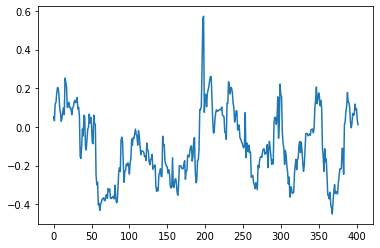

In [ ]:
parametros = pd.DataFrame(columns=["P0","P1","P2","P3","P4","P5"])

def calcularParametros(X , Y):
  y = np.array(Y)
  return np.linalg.inv(X.T @ X) @ ( X.T @ y)

val_param_3Reg=[]

for i in range(len(y_datos)-30):
  ventana_X = X[i:30+i]
  ventana_Y = y_datos[i:30+i]
  param = calcularParametros(ventana_X, ventana_Y)

  a = param[0]
  b1 = param[1]
  b2 = param[2]
  b3 = param[3]
  b4 = param[4]
  b5 = param[5]

  parametros = parametros.append({'P0':a,'P1':b1, 'P2':b2, 'P3':b3, 'P4':b4, 'P5':b5}, ignore_index = True)

plt.plot(parametros['P3'])



#***Respuesta 5***

Podemos observar que a medida que avanzamos la ventana, la matriz X cambia, y con ello tambien los parametros, ya que se el modelo se aproxima a la nueva matriz, por ende todos los parametros (llamados Px) cambian, incluido P3 del tercer regresor.

#### **6. Es dicha rentabilidad positiva? (2 puntos)**
  a. Si
    
  b. No

In [ ]:
rentabilidadFinal = 0
for i in range(len(y_datos)-30):
  ventana_X = X[i:i+30]
  ventana_Y = y_datos[i:i+30]
  param = calcularParametros(ventana_X, ventana_Y)
  pred = (ventana_X @ param)[29]
  if(pred > 0):
    rentabilidadFinal += float(y_datos[i+30])
    

print("{:.8f}".format(rentabilidadFinal))


0.13206254


#***Respuesta 6***

En este caso la rentabilidad es positiva debido a la aleatoriedad de los valores y que se ha dado el caso que mucho de los valores se encuentran en pendientes positivas en ambos modelos. 

Demostración de regresión usando graficas utilizando la libreria MatplotLib, de que tenemos un alto sesgo debido a que usamos un modelo lineal cuya complejidad es mas baja que la necesaria para el real, pero ya que es aleatorio da la casualidad que en nuestro caso observamos que cuando y_real crece, y_predicc tambien crece.

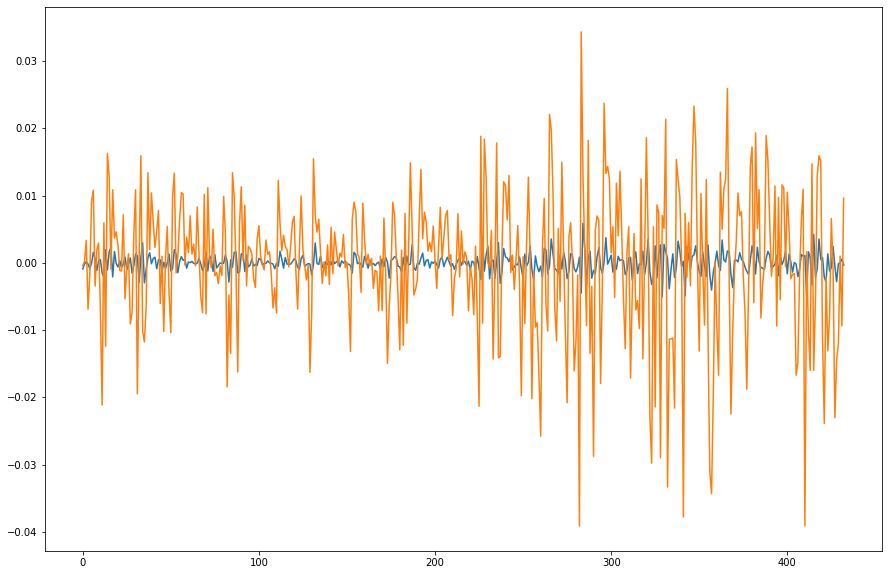

In [ ]:
plt.figure(figsize=(15, 10))
plt.plot(y_predicc)
plt.plot(y_datos)